In [23]:
import pandas as pd

In [24]:
# Load cleaned data
incomeDF = pd.read_excel("cleanIncomeData.xlsx", sheet_name="Cleaned Data")
expenseDF = pd.read_excel("cleanProductionExpensesData.xlsx", sheet_name="Cleaned Data")

# Combine datasets
mergedDF = pd.concat([incomeDF, expenseDF], ignore_index=True)

In [35]:
# Ensure all year columns are numeric
year_columns = mergedDF.columns[1:]  # All except 'cat'
mergedDF[year_columns] = mergedDF[year_columns].apply(pd.to_numeric, errors='coerce')

# Set 'cat' as index, transpose to have years as rows
model_df = mergedDF.set_index("cat").T.rename_axis("year")

# Define target and predictors
predictors = [
    "property taxes and fees",
    "intermediate product expenses > pesticide",
    "intermediate product expenses > electricity",
    "intermediate product expenses > fertilizer, lime, and soil conditioner",
    "intermediate product expenses > seed",
    "labor expenses > cash labor",
]
target = "gross cash income"

# Filter final modeling DataFrame
model_df = model_df[predictors + [target]].dropna()
model_df.head()

cat,property taxes and fees,intermediate product expenses > pesticide,intermediate product expenses > electricity,"intermediate product expenses > fertilizer, lime, and soil conditioner",intermediate product expenses > seed,labor expenses > cash labor,gross cash income
year,,,,,,,
2016,11897235000,15230869000,5585083000,23541108000,21823770000,33930127000,399353213000
2017,12739979000,15716091000,5805753000,22032717000,22515616000,35770180000,413155591000
2018,12716605000,15415784000,6052989000,23234502000,21915200000,33803909000,414846669000
2019,13297738000,15515886000,5745542000,22333163000,21214714000,34719699000,426473417000
2020,14045548000,16516911000,5964432000,24436286000,23015963000,36598287000,447356024000


In [45]:
from sklearn.model_selection import train_test_split

n = len(model_df)
train_size = int(n * 0.8)

train = model_df.iloc[:train_size]
test  = model_df.iloc[train_size:]

X_train, y_train = train[predictors], train[target]
X_test,  y_test  = test[predictors],  test[target]

# X_train.shape
# X_test.shape

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [47]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

y_pred = rf.predict(X_test)
r2   = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R²: {r2:.3f}")
print(f"Test RMSE: {rmse:,.0f}")

Test R²: -7.101
Test RMSE: 44,451,638,017


In [34]:
# Compare the real data and predicted data
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
}, index=y_test.index)
print(comparison)

            Actual     Predicted
year                            
2024  578152606000  5.705044e+11
2025  609387986000  5.469909e+11


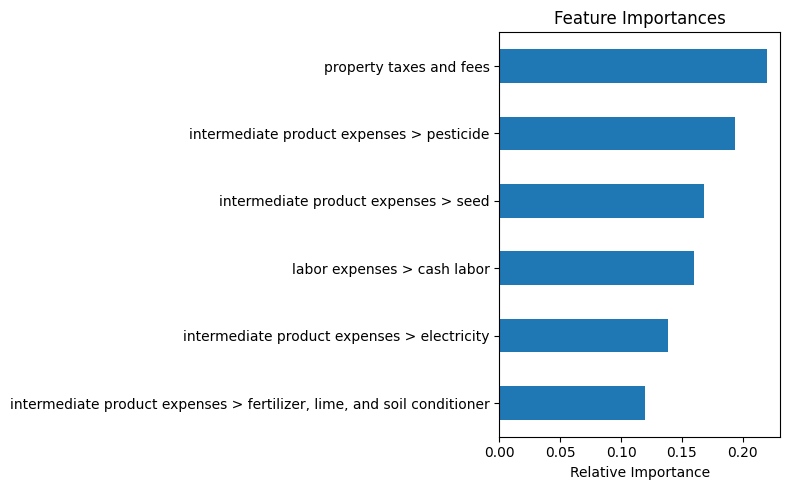

In [37]:
import matplotlib.pyplot as plt

fi = pd.Series(rf.feature_importances_, index=predictors).sort_values()
fi.plot(kind="barh", figsize=(8, 5))
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

In [38]:
# All data using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = model_df[predictors]
y = model_df[target]

# Testing R2
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
y_pred = rf.predict(X)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R² (All data): {r2:.3f}")
print(f"RMSE (All data): {rmse:,.0f}")


R² (All data): 0.982
RMSE (All data): 11,182,153,663


In [48]:
# All Data using Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)

r2_lr = r2_score(y, y_pred_lr)
print(f"Linear Regression R²: {r2_lr:.3f}")


Linear Regression R²: 0.987


In [49]:
# Splitting data using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Split as before
n = len(model_df)
train_size = int(n * 0.8)

train = model_df.iloc[:train_size]
test  = model_df.iloc[train_size:]

X_train, y_train = train[predictors], train[target]
X_test,  y_test  = test[predictors],  test[target]

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression Test R²: {r2:.3f}")
print(f"Linear Regression Test RMSE: {rmse:,.0f}")

# print predictions
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
}, index=y_test.index)
print("\nActual vs Predicted:\n", comparison)


Linear Regression Test R²: -67.766
Linear Regression Test RMSE: 129,510,127,616

Actual vs Predicted:
             Actual     Predicted
year                            
2024  578152606000  4.958177e+11
2025  609387986000  4.457826e+11
